In [187]:
what_were_covering = {
    1: "data (preparation and load)",
    2: "build model",
    3: "fitting the model to data(training)",
    4: "making predictions",
    5: "saving and loading a model",
    6: "putting it all together"
    }

In [188]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

## Data Preparation

Deep Learning is about two parts:
1. Get Data into a numerical representation
2. Build a model to learn patterns in that numerical representations

In [189]:
weight = 0.7
bias = 0.3 

# CREATE 
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets(One of the most important concepts)

In [190]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_test)

(40, 10)

How to better visualize the data

In [191]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots training data, test data and compares predictions
    """
    
    plt.figure(figsize=(10,7))
    
    # Plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    
    # Plot testing data in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test Data")
    
    # Plotting predictions
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label="Predictions")
    
    plt.legend(prop={"size":14})

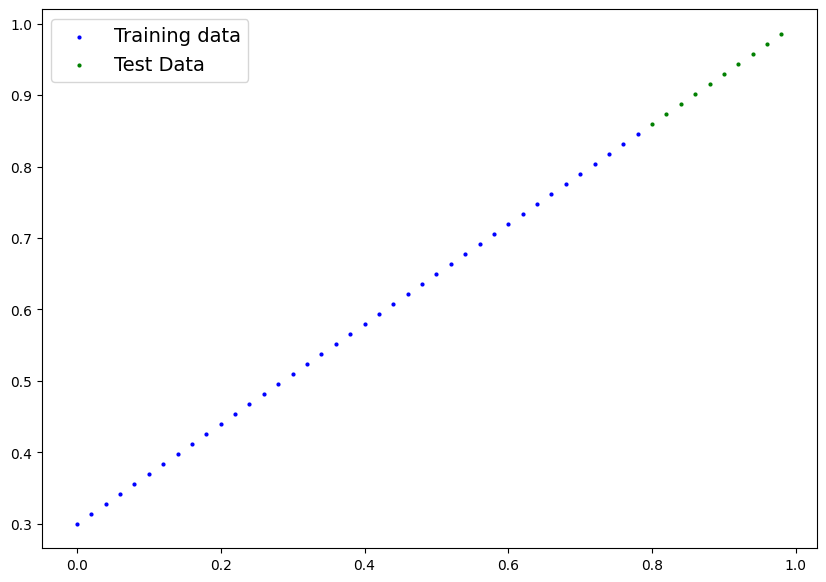

In [192]:
plot_predictions()

## 2. Build Model
First Pytorch model!

In [193]:
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=float))
        
        # Forward method to define the computation in the model
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias #Linear Regression formula
        
        
        

In [194]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())



[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [195]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

### Making predictions using `torch.inference_mode()`
To check the model's predictive power, we chek how well it predicts `y_test` based on `X_test`.
When we pass data through our model, it's going to run it through the `forward()` method.

In [196]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

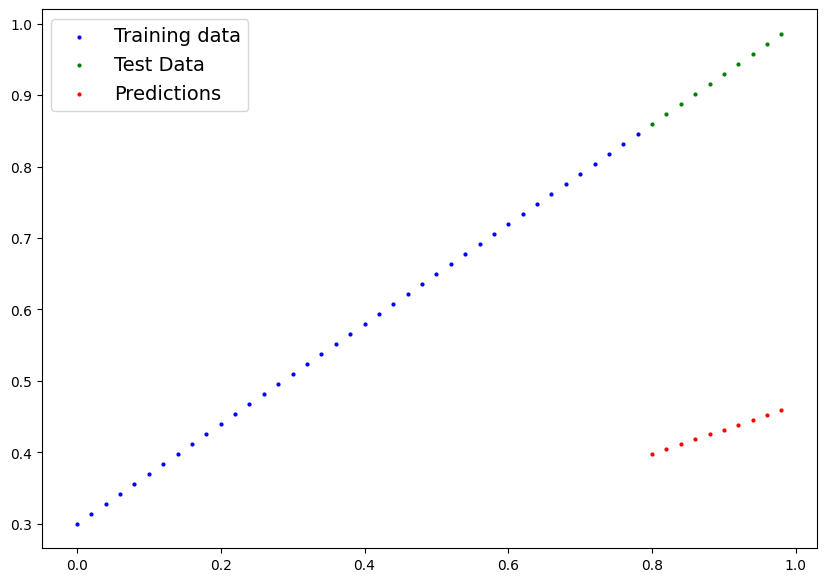

In [197]:
plot_predictions(predictions=y_preds)

### 3. Train model
The idea is to move from random *unknown* parameters to some *known* parameters

Or in other words, from a poor representation of the data to a better representation of the data.

One way to measure how poor or wrong our model predictions are is to use a loss function

* Note: Loss function also called cost function, or criterion.

Things we need to train:
* **Loss Function:** A function to measure how wrong our model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (eg . weights and bias in our case) to improve the loss function. 

And specifically for PyTorch, we need:
* A training loop 
* A testing loop

In [198]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop: 
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions. Also called forward propagation)
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss Backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters(**gradient descent**)

In [199]:
epochs = 250
epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    # 1. forward pass
    y_pred = model_0(X_train)
    
    # 2. calculate the loss
    loss = loss_fn(y_pred,y_train)
    
    # 3. optimizer zero grad
    optimizer.zero_grad()
    
    # 4. backpropagation
    loss.backward()
    
    # 5. Step the optimizer 
    optimizer.step()
    
    ### Testing
    model_0.eval 
    
    with torch.inference_mode():
        # 1. Do the forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred,y_test)
    if epoch%10==0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_0.state_dict())
    

Epoch: 0 | Loss: 0.3128813517678373 | Test Loss: 0.4810651795382455
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388], dtype=torch.float64)})
Epoch: 10 | Loss: 0.19767138632506426 | Test Loss: 0.346355255078788
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388], dtype=torch.float64)})
Epoch: 20 | Loss: 0.08908726094682914 | Test Loss: 0.21729659528684148
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333], dtype=torch.float64)})
Epoch: 30 | Loss: 0.05314853437903411 | Test Loss: 0.14464020247411263
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768], dtype=torch.float64)})
Epoch: 40 | Loss: 0.045437965798191725 | Test Loss: 0.11360953504991064
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868], dtype=torch.float64)})
Epoch: 50 | Loss: 0.04167863324115598 | Test Loss: 0.09919951553296583
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843], dtype=torch.float64)})
Epoch: 60 | Loss: 0.03818932177440422 

In [200]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

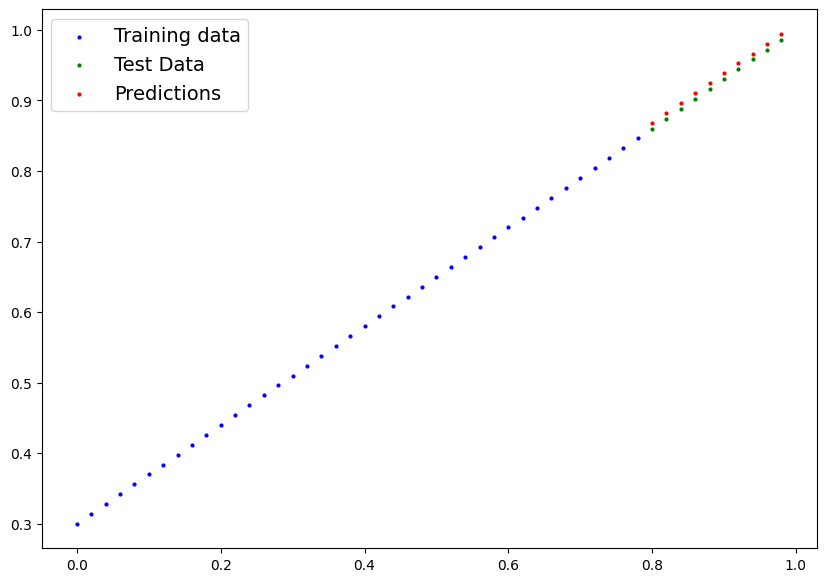

In [201]:
plot_predictions(predictions=(y_preds_new))

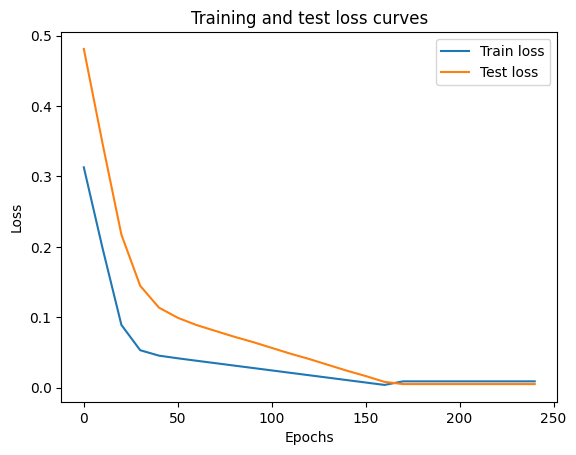

In [202]:
plt.plot(epoch_count,np.array(torch.tensor(train_loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### Saving the model in PyTorch

There are three main methods for saving and loading models in PyTorch

1. `torch.save()` - allows to save a PyTorch object in Python's pickle format
2. `torch.load()` - allow to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary.

In [206]:
from pathlib import Path

MODEL_PATH = Path("saved_models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# Create model save path
MODEL_NAME = "liner_regression_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the state dict
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [207]:
# To load in a saved state_dict we have to instantiate a new instance of our model class 

loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0(this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

C:\Users\mufas\AppData\Local\Temp\ipykernel_15808\3185152797.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)

<All keys matched successfully>

In [208]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    

In [209]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])